In [10]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [20]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

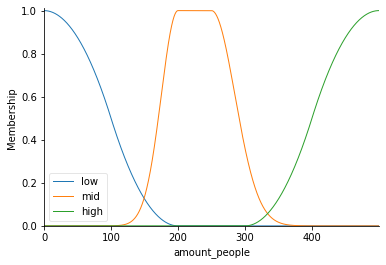

In [21]:
amount_people = ctrl.Antecedent(np.arange(0, 500, 0.1), "amount_people")

amount_people['low'] = skf.zmf(amount_people.universe, 0, 200)
amount_people["mid"] = skf.gauss2mf(amount_people.universe, 200, 25, 250, 35)
amount_people["high"] = skf.smf(amount_people.universe, 300, 500)

amount_people.view()

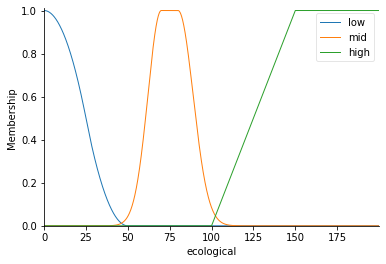

In [22]:
ecological = ctrl.Antecedent(np.arange(0, 200, 0.1), "ecological")

ecological['low'] = skf.zmf(ecological.universe, 0, 50)
ecological["mid"] = skf.gauss2mf(ecological.universe, 70, 8, 80, 9)
ecological["high"] = trapezoid(ecological.universe, 100, 150, 200, 200)

ecological.view()

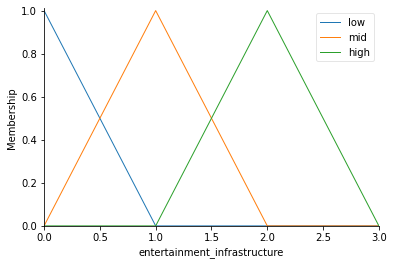

In [23]:
entertainment_infrastructure = ctrl.Antecedent(np.arange(0, 4, 1), "entertainment_infrastructure")

entertainment_infrastructure['low'] = trapezoid(entertainment_infrastructure.universe, -1, 0, 0, 1)
entertainment_infrastructure['mid'] = trapezoid(entertainment_infrastructure.universe, 0, 1, 1, 2)
entertainment_infrastructure['high'] = trapezoid(entertainment_infrastructure.universe, 1, 2, 2, 3)

entertainment_infrastructure.view()

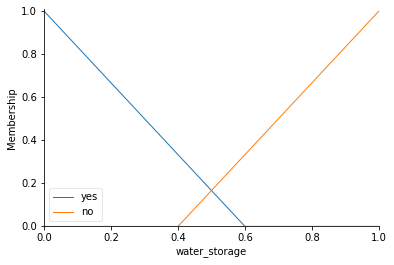

In [24]:
water_storage = ctrl.Antecedent(np.arange(0, 1.1, 0.1), "water_storage")

water_storage['yes'] = trapezoid(water_storage.universe, -1, 0, 0, 0.6)
water_storage['no'] = trapezoid(water_storage.universe, 0.4, 1, 1, 2)

water_storage.view()

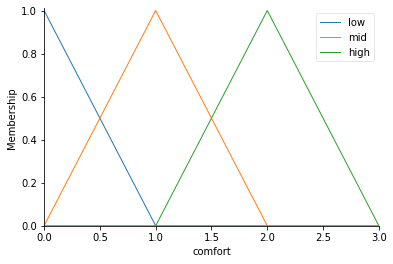

In [25]:
comfort = ctrl.Consequent(np.arange(0, 4, 1), "comfort")

comfort['low'] = trapezoid(comfort.universe, -1, 0, 0, 1)
comfort['mid'] = trapezoid(comfort.universe, 0, 1, 1, 2)
comfort['high'] = trapezoid(comfort.universe, 1, 2, 2, 3)

comfort.view()

In [26]:
rule1 = ctrl.Rule(amount_people['mid'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['mid']])
rule2 = ctrl.Rule(amount_people['low'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['high']])
rule3 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['mid']])
rule4 = ctrl.Rule(amount_people['high'] & ecological['low'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['low']])
rule5 = ctrl.Rule(amount_people['high'] & ecological['high'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['high']])
rule6 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['low']])
rule7 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['mid'] & water_storage['yes'], 
                  [comfort['high']])
rule8 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['low'] & water_storage['yes'], 
                  [comfort['low']])
rule9 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['mid']])
rule10 = ctrl.Rule(amount_people['high'] & ecological['low'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['low']])
rule11 = ctrl.Rule(amount_people['high'] & ecological['high'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['high']])
rule12 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['low'] & water_storage['yes'], 
                  [comfort['mid']])
rule13 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['high']])
rule14 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['low'] & water_storage['yes'], 
                  [comfort['low']])
rule15 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['low'] & water_storage['yes'], 
                  [comfort['low']])
rule16 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['mid']])
rule17 = ctrl.Rule(amount_people['mid'] & ecological['mid'] & entertainment_infrastructure['high'] & water_storage['yes'], 
                  [comfort['mid']])
rule18 = ctrl.Rule(amount_people['mid'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['mid']])
rule19 = ctrl.Rule(amount_people['low'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['mid']])
rule20 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['low']])
rule21 = ctrl.Rule(amount_people['high'] & ecological['low'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['low']])
rule22 = ctrl.Rule(amount_people['high'] & ecological['high'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['mid']])
rule23 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['low']])
rule24 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['mid'] & water_storage['no'], 
                  [comfort['mid']])
rule25 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['low'] & water_storage['no'], 
                  [comfort['low']])
rule26 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['low']])
rule27 = ctrl.Rule(amount_people['high'] & ecological['low'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['low']])
rule28 = ctrl.Rule(amount_people['high'] & ecological['high'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['mid']])
rule29 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['low'] & water_storage['no'], 
                  [comfort['low']])
rule30 = ctrl.Rule(amount_people['low'] & ecological['high'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['high']])
rule31 = ctrl.Rule(amount_people['low'] & ecological['low'] & entertainment_infrastructure['low'] & water_storage['no'], 
                  [comfort['low']])
rule32 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['low'] & water_storage['no'], 
                  [comfort['low']])
rule33 = ctrl.Rule(amount_people['high'] & ecological['mid'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['low']])
rule34 = ctrl.Rule(amount_people['mid'] & ecological['mid'] & entertainment_infrastructure['high'] & water_storage['no'], 
                  [comfort['mid']])

In [27]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule28,
              rule29, rule31, rule32, rule33, rule34]

mark_ctrl = ctrl.ControlSystem(rules_base)
marking = ctrl.ControlSystemSimulation(mark_ctrl)

1.0


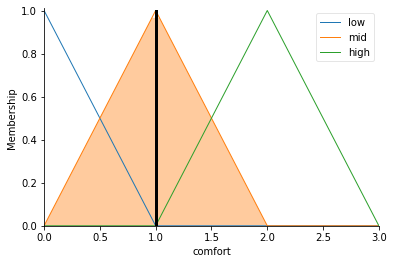

In [30]:
#1  
marking.input['amount_people'] = 26
marking.input['ecological'] = 191
marking.input['entertainment_infrastructure'] = 0
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

0.9999999999999998


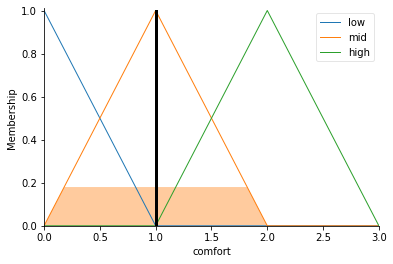

In [31]:
#2 
marking.input['amount_people'] = 13
marking.input['ecological'] = 35
marking.input['entertainment_infrastructure'] = 2
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

1.0


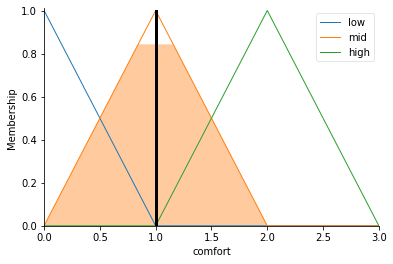

In [32]:
#3 
marking.input['amount_people'] = 13
marking.input['ecological'] = 14
marking.input['entertainment_infrastructure'] = 2
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

0.3333333466640005


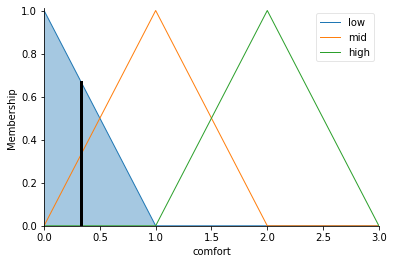

In [33]:
#4 
marking.input['amount_people'] = 2
marking.input['ecological'] = 160
marking.input['entertainment_infrastructure'] = 0
marking.input['water_storage'] = 1
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

0.3449377609540716


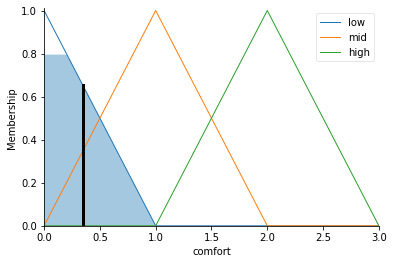

In [34]:
#5 
marking.input['amount_people'] = 17
marking.input['ecological'] = 16
marking.input['entertainment_infrastructure'] = 1
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

0.3334640522875817


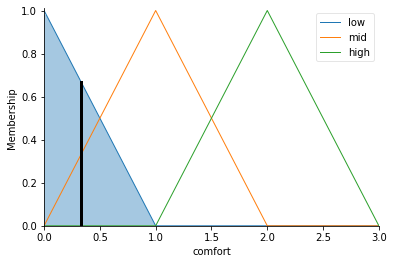

In [35]:
#6 
marking.input['amount_people'] = 20
marking.input['ecological'] = 168
marking.input['entertainment_infrastructure'] = 0
marking.input['water_storage'] = 1
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

1.9999999999864475


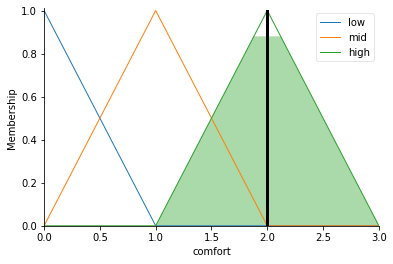

In [36]:
#7
marking.input['amount_people'] = 21
marking.input['ecological'] = 144
marking.input['entertainment_infrastructure'] = 2
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

1.9999999999532059


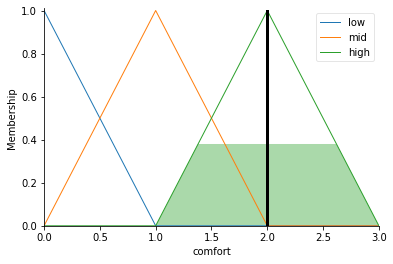

In [37]:
#8  
marking.input['amount_people'] = 24
marking.input['ecological'] = 119
marking.input['entertainment_infrastructure'] = 2
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

1.9999999999060931


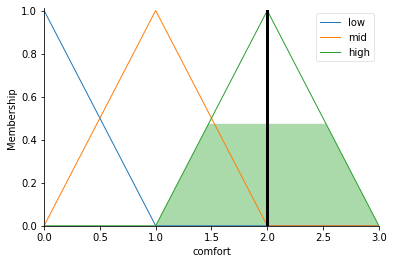

In [38]:
#9 
marking.input['amount_people'] = 27
marking.input['ecological'] = 91
marking.input['entertainment_infrastructure'] = 1
marking.input['water_storage'] = 0
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)

2.36242676840271e-12


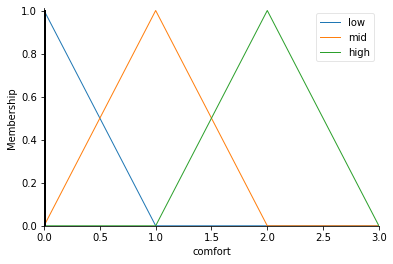

In [39]:
#10 
marking.input['amount_people'] = 20
marking.input['ecological'] = 181
marking.input['entertainment_infrastructure'] = 2
marking.input['water_storage'] = 1
marking.compute()

print(marking.output['comfort'])
comfort.view(sim=marking)